In [1]:
!pip install scikit-fuzzy 

  Using cached scikit_fuzzy-0.5.0-py2.py3-none-any.whl.metadata (2.6 kB)
Using cached scikit_fuzzy-0.5.0-py2.py3-none-any.whl (920 kB)


In [2]:
import numpy as np
import skfuzzy as fuzz
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data.T  # transpose to shape (features, samples)

In [4]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data).T  # transpose again for skfuzzy

In [5]:
# Apply Fuzzy C-Means
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled, c=n_clusters, m=2, error=0.005, maxiter=1000)

In [6]:
# Get the most likely cluster membership for each sample
cluster_labels = np.argmax(u, axis=0)

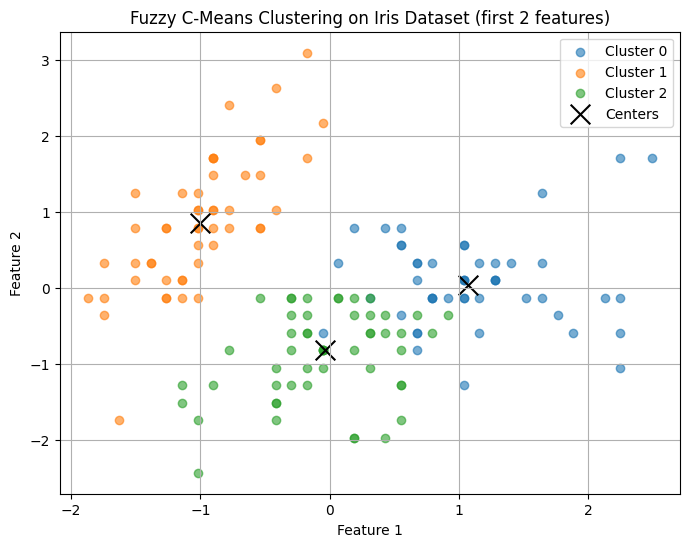

In [7]:
# Plot the result using first two features
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X_scaled[0, cluster_labels == i], X_scaled[1, cluster_labels == i],
                label=f'Cluster {i}', alpha=0.6)
# Plot the cluster centers
plt.scatter(cntr[:, 0], cntr[:, 1], marker='x', s=200, color='k', label='Centers')
plt.title("Fuzzy C-Means Clustering on Iris Dataset (first 2 features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()